# COVID-19 Coronavirus pandemic viewed by Country

Importing necessary libraries

In [126]:
from bs4 import BeautifulSoup as soup # Beautiful Soup is a Python library for getting data out of HTML, XML, and other markup languages
from urllib.request import Request, urlopen # request is a Python module for fetching URLs
import pandas as pd
import numpy as np
from datetime import date, datetime
import matplotlib.pyplot as plt
import gc #garbage collector
import plotly.graph_objects as go # plotly Python library is an interactive, open-source plotting library
# The plotly.graph_objects module contains an automatically-generated hierarchy of Python classes which represent non-leaf nodes in this figure schema.
import plotly.offline as py # requires no internet connection, no account, no authentication tokens, and no payment of any kind
py.init_notebook_mode(connected=True) # In order to display the plot inside the notebook, you need to initiate plotly’s notebook mode as shown beside
import seaborn as sns

Web scraping

In [127]:
fname = 'https://www.worldometers.info/coronavirus/'
req = Request(fname, headers={'User-Agent': 'Mozilla/5.0'}) # Mozilla/5.0 is the general token that says the browser is Mozilla-compatible. 
webpage = urlopen(req)
page_soup = soup(webpage, "html.parser")
today = datetime.now()
today_str = "%s %d, %d" % (date.today().strftime("%b"), today.day, today.year)
yesterday_str = "%s %d, %d" % (date.today().strftime("%b"), today.day-1, today.year)
clean = True # If clean is set to true, then the numerical data will be converted from a string to a float.

Scraping script

In [128]:
table = page_soup.findAll("table", {"id": "main_table_countries_today"})
containers = table[0].findAll("tr", {"style": ""})
del containers[0]

all_data = []
for country in containers:
    country_data = []
    country_container = country.findAll("td")
    #if country_container[1].text == 'China':
    #    continue
    for i in range(1, len(country_container)):
        final_feature = country_container[i].text
        if clean:
            if i != 1 and i != len(country_container)-1:
                final_feature = final_feature.replace(',', '')
                if final_feature.find('+') != -1:
                    final_feature = final_feature.replace('+', '')
                    final_feature = float(final_feature)
                elif final_feature.find('-') != -1:
                    final_feature = final_feature.replace('-', '')
                    final_feature = float(final_feature)*-1
        if final_feature == 'N/A':
            final_feature = 0
        elif final_feature == '' or final_feature == ' ':
            final_feature = -1 #No value
        country_data.append(final_feature)
    all_data.append(country_data)

In [129]:
all_data

[['World',
  '101044608',
  226433.0,
  '2173781',
  8345.0,
  '73028609',
  191964.0,
  '25842218',
  '110205',
  '12963',
  '278.9',
  -1,
  -1,
  -1,
  'All',
  '\n',
  -1,
  -1],
 ['USA',
  '26037621',
  26307.0,
  '436350 ',
  890.0,
  '15770522',
  3065.0,
  '9830749',
  '25993',
  '78400',
  '1314',
  '302985233',
  '912293',
  '332113877 ',
  'North America',
  '13',
  '761',
  '1'],
 ['India',
  '10690279',
  -1,
  '153751 ',
  -1,
  '10359305',
  977.0,
  '177223',
  '8944',
  '7703',
  '111',
  '193613120',
  '139516',
  '1387752969 ',
  'Asia',
  '130',
  '9026',
  '7'],
 ['Brazil',
  '8936590',
  -1,
  '218918 ',
  -1,
  '7798655',
  -1,
  '919017',
  '8318',
  '41873',
  '1026',
  '28600000',
  '134006',
  '213423798 ',
  'South America',
  '24',
  '975',
  '7'],
 ['Russia',
  '3774672',
  17741.0,
  '71076 ',
  594.0,
  '3202483',
  27922.0,
  '501113',
  '2300',
  '25859',
  '487',
  '100356399',
  '687512',
  '145970401 ',
  'Europe',
  '39',
  '2054',
  '1'],
 ['UK',


In [130]:
df = pd.DataFrame(all_data)
df = df.drop([15, 16, 17], axis=1) #c15= 1 case every X people, c16= 1 death every X people, c17= 1 test every X people

In [131]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,World,101044608,226433.0,2173781,8345.0,73028609,191964.0,25842218,110205,12963,278.9,-1,-1,-1,All
1,USA,26037621,26307.0,436350,890.0,15770522,3065.0,9830749,25993,78400,1314,302985233,912293,332113877,North America
2,India,10690279,-1.0,153751,-1.0,10359305,977.0,177223,8944,7703,111,193613120,139516,1387752969,Asia
3,Brazil,8936590,-1.0,218918,-1.0,7798655,-1.0,919017,8318,41873,1026,28600000,134006,213423798,South America
4,Russia,3774672,17741.0,71076,594.0,3202483,27922.0,501113,2300,25859,487,100356399,687512,145970401,Europe


In [132]:
column_labels = ["Country", "Total Cases", "New Cases", "Total Deaths", "New Deaths", "Total Recovered", "New Recovered", "Active Cases", "Serious/Critical",
                "Tot Cases/1M", "Deaths/1M", "Total Tests", "Tests/1M", "Population", "Continent"]
df.columns = column_labels

In [133]:
df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Tot Cases/1M,Deaths/1M,Total Tests,Tests/1M,Population,Continent
0,World,101044608,226433.0,2173781,8345.0,73028609,191964.0,25842218,110205,12963,278.9,-1,-1,-1,All
1,USA,26037621,26307.0,436350,890.0,15770522,3065.0,9830749,25993,78400,1314,302985233,912293,332113877,North America
2,India,10690279,-1.0,153751,-1.0,10359305,977.0,177223,8944,7703,111,193613120,139516,1387752969,Asia
3,Brazil,8936590,-1.0,218918,-1.0,7798655,-1.0,919017,8318,41873,1026,28600000,134006,213423798,South America
4,Russia,3774672,17741.0,71076,594.0,3202483,27922.0,501113,2300,25859,487,100356399,687512,145970401,Europe


In [134]:
country_labels = page_soup.findAll("a", {"class": "mt_a"})
c_label = []
for country in country_labels:
    c_label.append(country.text)
c_label = set(c_label)

not_counted = []
sorted_countries = set(df['Country']) #Increase computational speed
for country in c_label:
    if country not in sorted_countries:
        not_counted.append(country)

In [135]:
print("The countries that was not included while scraping are:\n")
for i, item in enumerate(not_counted,1):
    print(i, '. ' + item+'\n')

The countries that was not included while scraping are:

1 . Samoa

2 . Greenland

3 . Fiji

4 . Marshall Islands

5 . Tajikistan

6 . Montserrat

7 . Vanuatu



In [136]:
for label in df.columns:
    if label != 'Country' and label != 'Continent':
        df[label] = pd.to_numeric(df[label])

In [137]:
pd.options.display.max_rows = None # none indicated unlimited
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Tot Cases/1M,Deaths/1M,Total Tests,Tests/1M,Population,Continent
0,World,101044608,226433.0,2173781,8345.0,73028609,191964.0,25842218,110205,12963.0,278.9,-1,-1,-1,All
1,USA,26037621,26307.0,436350,890.0,15770522,3065.0,9830749,25993,78400.0,1314.0,302985233,912293,332113877,North America
2,India,10690279,-1.0,153751,-1.0,10359305,977.0,177223,8944,7703.0,111.0,193613120,139516,1387752969,Asia
3,Brazil,8936590,-1.0,218918,-1.0,7798655,-1.0,919017,8318,41873.0,1026.0,28600000,134006,213423798,South America
4,Russia,3774672,17741.0,71076,594.0,3202483,27922.0,501113,2300,25859.0,487.0,100356399,687512,145970401,Europe
5,UK,3715054,25308.0,101887,1725.0,1662484,-1.0,1950683,3961,54561.0,1496.0,70037093,1028592,68090245,Europe
6,France,3079943,-1.0,74106,-1.0,219152,-1.0,2786685,3081,47125.0,1134.0,42478948,649959,65356380,Europe
7,Spain,2733729,-1.0,56799,-1.0,0,0.0,0,4433,58457.0,1215.0,32027728,684863,46765179,Europe
8,Italy,2501147,15204.0,86889,467.0,1936289,19172.0,477969,2352,41402.0,1438.0,31611023,523269,60410710,Europe
9,Turkey,2442350,-1.0,25344,-1.0,2322511,-1.0,94495,1791,28782.0,299.0,28828496,339730,84857060,Asia


In [138]:
df.columns

Index(['Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'New Recovered', 'Active Cases', 'Serious/Critical',
       'Tot Cases/1M', 'Deaths/1M', 'Total Tests', 'Tests/1M', 'Population',
       'Continent'],
      dtype='object')

In [139]:
all(isinstance(column, str) for column in df.columns)


True

In [146]:
 df.set_index('Country', inplace=True) #only if necessary

In [147]:
df.head()

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Tot Cases/1M,Deaths/1M,Total Tests,Tests/1M,Population,Continent
Country,,,,,,,,,,,,,,
World,101044608,226433.0,2173781,8345.0,73028609,191964.0,25842218,110205,12963.0,278.9,-1,-1,-1,All
USA,26037621,26307.0,436350,890.0,15770522,3065.0,9830749,25993,78400.0,1314.0,302985233,912293,332113877,North America
India,10690279,-1.0,153751,-1.0,10359305,977.0,177223,8944,7703.0,111.0,193613120,139516,1387752969,Asia
Brazil,8936590,-1.0,218918,-1.0,7798655,-1.0,919017,8318,41873.0,1026.0,28600000,134006,213423798,South America
Russia,3774672,17741.0,71076,594.0,3202483,27922.0,501113,2300,25859.0,487.0,100356399,687512,145970401,Europe


In [148]:
df.dtypes

Total Cases           int64
New Cases           float64
Total Deaths          int64
New Deaths          float64
Total Recovered       int64
New Recovered       float64
Active Cases          int64
Serious/Critical      int64
Tot Cases/1M        float64
Deaths/1M           float64
Total Tests           int64
Tests/1M              int64
Population            int64
Continent            object
dtype: object

In [149]:
df['Active Cases']

Country
World                     25842218
USA                        9830749
India                       177223
Brazil                      919017
Russia                      501113
UK                         1950683
France                     2786685
Spain                            0
Italy                       477969
Turkey                       94495
Germany                     246128
Colombia                    124320
Argentina                   163402
Mexico                      288229
Poland                      207191
South Africa                127107
Iran                        151200
Ukraine                     198596
Peru                         44396
Indonesia                   164113
Netherlands                      0
Czechia                      98846
Canada                       59551
Romania                      38197
Chile                        25049
Belgium                     627539
Portugal                    172893
Israel                       75920
Iraq        

In [150]:
from matplotlib.ticker import ScalarFormatter

# Plot 1:

In [151]:
t_info = df[["Total Recovered", "Active Cases", "Total Deaths"]].loc['World']
t_info=pd.DataFrame(t_info).transpose()
t_info

,Total Recovered,Active Cases,Total Deaths
World,73028609,25842218,2173781


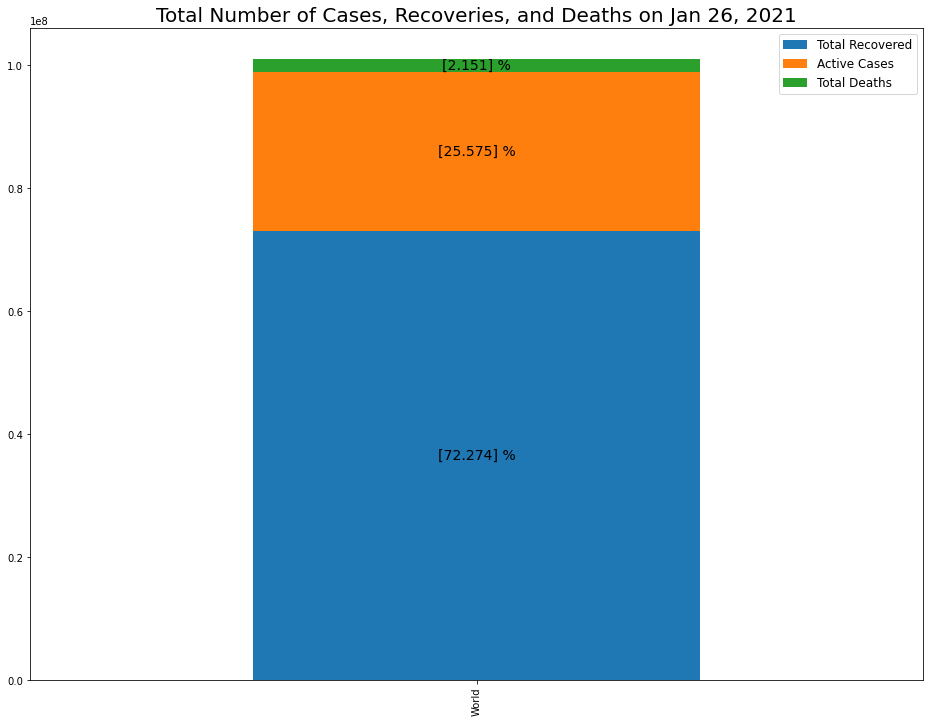

In [152]:
t_info.plot(kind='bar',stacked=True, figsize=(16, 12))
#plt.xticks(np.arange(0, 0, 1)) # No Ticks
plt.title(f"Total Number of Cases, Recoveries, and Deaths on {yesterday_str}", fontsize=20)
plt.legend(prop={"size": 12})

prev = 0
total = t_info.transpose().sum()
l=t_info.transpose().cumsum().values.tolist()
sl=map(str, l)

for n in sl:
     n=n.replace('[','')
     n=n.replace(']','')
     n=int(n)
     val = round((n-prev)/total*100, 3).values
     plt.annotate(f"{val} %", (0, (n-prev)/2+prev), fontsize=14, va='center',ha='center')
     prev = n
plt.show()

# Plot 2:


In [153]:
t_info = df[["New Recovered", "New Cases", "New Deaths"]].loc['World']
t_info=pd.DataFrame(t_info).transpose()
t_info

,New Recovered,New Cases,New Deaths
World,191964.0,226433.0,8345.0


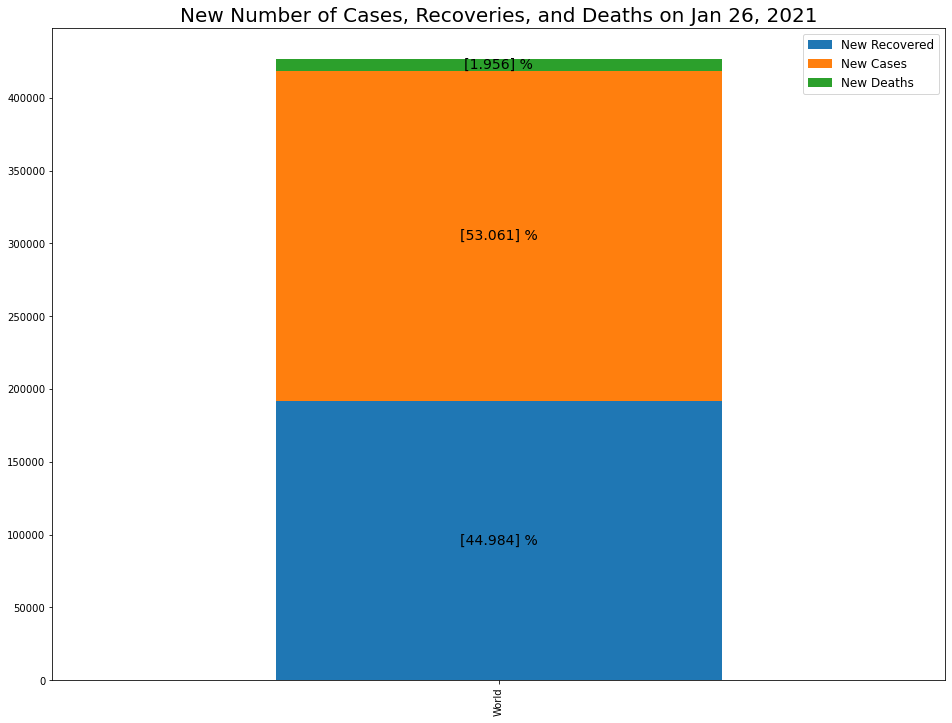

In [154]:
t_info.plot(kind='bar',stacked=True, figsize=(16, 12))
#plt.xticks(np.arange(0, 0, 1)) # No Ticks
plt.title(f"New Number of Cases, Recoveries, and Deaths on {yesterday_str}", fontsize=20)
plt.legend(prop={"size": 12})

prev = 0
total = t_info.transpose().sum()
l=t_info.transpose().cumsum().values.tolist()
sl=map(str, l)

for n in sl:
     n=n.replace('[','')
     n=n.replace(']','')
     n=float(n)
     val = round((n-prev)/total*100, 3).values
     plt.annotate(f"{val} %", (0, (n-prev)/2+prev), fontsize=14, va='center',ha='center')
     prev = n
plt.show()

In [156]:
df=df.reset_index()

In [158]:
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Tot Cases/1M,Deaths/1M,Total Tests,Tests/1M,Population,Continent
0,World,101044608,226433.0,2173781,8345.0,73028609,191964.0,25842218,110205,12963.0,278.9,-1,-1,-1,All
1,USA,26037621,26307.0,436350,890.0,15770522,3065.0,9830749,25993,78400.0,1314.0,302985233,912293,332113877,North America
2,India,10690279,-1.0,153751,-1.0,10359305,977.0,177223,8944,7703.0,111.0,193613120,139516,1387752969,Asia
3,Brazil,8936590,-1.0,218918,-1.0,7798655,-1.0,919017,8318,41873.0,1026.0,28600000,134006,213423798,South America
4,Russia,3774672,17741.0,71076,594.0,3202483,27922.0,501113,2300,25859.0,487.0,100356399,687512,145970401,Europe
5,UK,3715054,25308.0,101887,1725.0,1662484,-1.0,1950683,3961,54561.0,1496.0,70037093,1028592,68090245,Europe
6,France,3079943,-1.0,74106,-1.0,219152,-1.0,2786685,3081,47125.0,1134.0,42478948,649959,65356380,Europe
7,Spain,2733729,-1.0,56799,-1.0,0,0.0,0,4433,58457.0,1215.0,32027728,684863,46765179,Europe
8,Italy,2501147,15204.0,86889,467.0,1936289,19172.0,477969,2352,41402.0,1438.0,31611023,523269,60410710,Europe
9,Turkey,2442350,-1.0,25344,-1.0,2322511,-1.0,94495,1791,28782.0,299.0,28828496,339730,84857060,Asia


In [159]:
active=df[['Active Cases','Country']].sort_values(by='Active Cases',ascending=False)
#active.drop(['World'],axis=0,inplace=True)
#active=df[['Active Cases']].head(20)
active=active.head(20)
active


,Active Cases,Country
0,25842218,World
213,25842218,Total:
1,9830749,USA
6,2786685,France
5,1950683,UK
3,919017,Brazil
25,627539,Belgium
4,501113,Russia
8,477969,Italy
36,353565,Serbia


In [160]:
for num in active['Active Cases']:
    print(num)

25842218
25842218
9830749
2786685
1950683
919017
627539
501113
477969
353565
288229
246128
207191
198596
188679
177223
172893
164113
163421
163402


In [161]:
active.loc[0]

Active Cases    25842218
Country            World
Name: 0, dtype: object

# Plot 3:

In [162]:
active=active.drop(0) #World
active=active.drop(213) #All

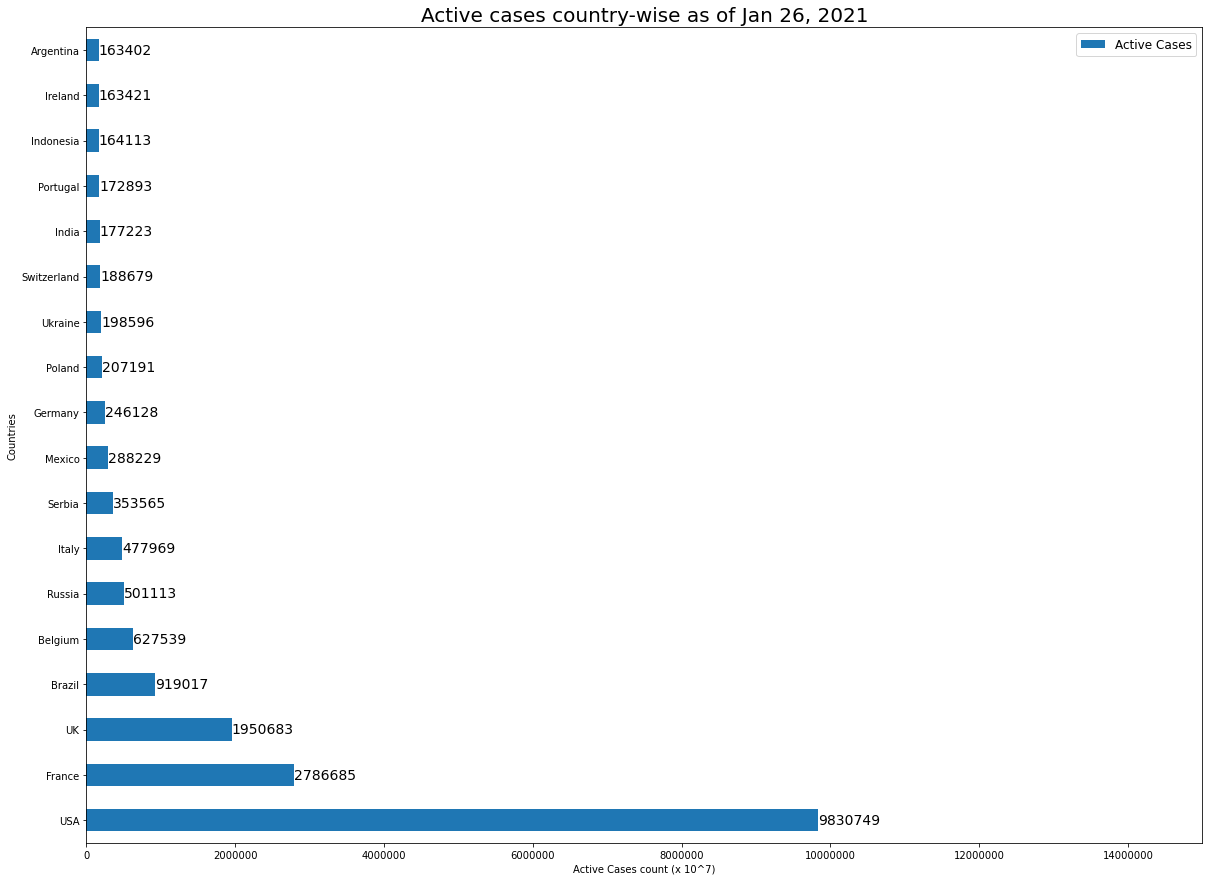

In [168]:
active.plot(kind='barh',figsize=(20,15),xlim=[0,15000000])
#plt.text(x,y =active+1 , s=f"{active}" , fontdict=dict(fontsize=20), va='center')
plt.title(f'Active cases country-wise as of {yesterday_str}',fontsize=20)
countries=list(map(str,active['Country']))
t=range(0,len(countries))
plt.yticks(ticks=t,labels=countries)
plt.ylabel('Countries')
plt.xlabel('Active Cases count (x 10^7)')
plt.legend(prop={"size": 12})
count=-1
for num in active['Active Cases']:
    count=count+1
    plt.annotate(f"{num}", (num+2,count), fontsize=14,va='center')
plt.ticklabel_format(axis='x', style='plain')
plt.show()

# Plot 4:

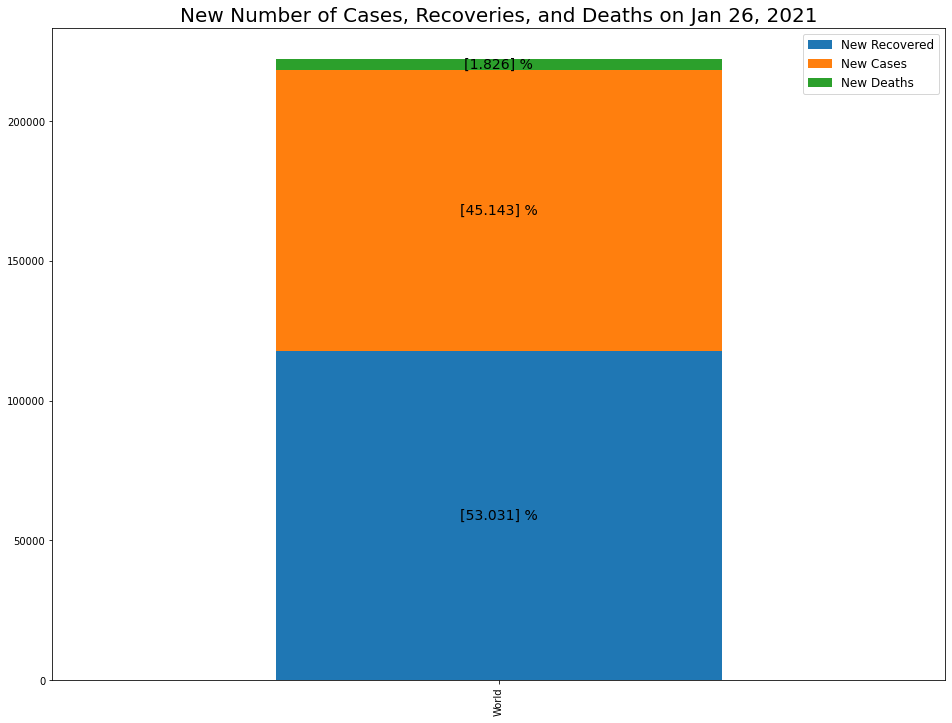

In [28]:
t_info = df[["New Recovered", "New Cases", "New Deaths"]].loc['World']
t_info=pd.DataFrame(t_info).transpose()


t_info.plot(kind='bar',stacked=True, figsize=(16, 12))
#plt.xticks(np.arange(0, 0, 1)) # No Ticks
plt.title(f"New Number of Cases, Recoveries, and Deaths on {yesterday_str}", fontsize=20)
plt.legend(prop={"size": 12})

prev = 0
total = t_info.transpose().sum()
l=t_info.transpose().cumsum().values.tolist()
sl=map(str, l)

for n in sl:
     n=n.replace('[','')
     n=n.replace(']','')
     n=float(n)
     val = round((n-prev)/total*100, 3).values
     plt.annotate(f"{val} %", (0, (n-prev)/2+prev), fontsize=14, va='center',ha='center')
     prev = n
plt.show()



In [169]:
df['%Total/population']=((df['Total Cases']/df['Population'])*100)
df['%Active/population']=(df['Active Cases']/df['Population'])*100
df['%Death/population']=(df['Total Deaths']/df['Population'])*100
df['%Recovered/population']=(df['Total Recovered']/df['Population'])*100
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Tot Cases/1M,Deaths/1M,Total Tests,Tests/1M,Population,Continent,%Total/population,%Active/population,%Death/population,%Recovered/population
0,World,101044608,226433.0,2173781,8345.0,73028609,191964.0,25842218,110205,12963.0,278.9,-1,-1,-1,All,-1.010446e+10,-2.584222e+09,-2.173781e+08,-7.302861e+09
1,USA,26037621,26307.0,436350,890.0,15770522,3065.0,9830749,25993,78400.0,1314.0,302985233,912293,332113877,North America,7.839968e+00,2.960054e+00,1.313857e-01,4.748528e+00
2,India,10690279,-1.0,153751,-1.0,10359305,977.0,177223,8944,7703.0,111.0,193613120,139516,1387752969,Asia,7.703301e-01,1.277050e-02,1.107913e-02,7.464805e-01
3,Brazil,8936590,-1.0,218918,-1.0,7798655,-1.0,919017,8318,41873.0,1026.0,28600000,134006,213423798,South America,4.187251e+00,4.306066e-01,1.025743e-01,3.654070e+00
4,Russia,3774672,17741.0,71076,594.0,3202483,27922.0,501113,2300,25859.0,487.0,100356399,687512,145970401,Europe,2.585916e+00,3.432977e-01,4.869206e-02,2.193926e+00
5,UK,3715054,25308.0,101887,1725.0,1662484,-1.0,1950683,3961,54561.0,1496.0,70037093,1028592,68090245,Europe,5.456074e+00,2.864849e+00,1.496352e-01,2.441589e+00
6,France,3079943,-1.0,74106,-1.0,219152,-1.0,2786685,3081,47125.0,1134.0,42478948,649959,65356380,Europe,4.712536e+00,4.263830e+00,1.133876e-01,3.353184e-01
7,Spain,2733729,-1.0,56799,-1.0,0,0.0,0,4433,58457.0,1215.0,32027728,684863,46765179,Europe,5.845651e+00,0.000000e+00,1.214558e-01,0.000000e+00
8,Italy,2501147,15204.0,86889,467.0,1936289,19172.0,477969,2352,41402.0,1438.0,31611023,523269,60410710,Europe,4.140238e+00,7.911991e-01,1.438305e-01,3.205208e+00
9,Turkey,2442350,-1.0,25344,-1.0,2322511,-1.0,94495,1791,28782.0,299.0,28828496,339730,84857060,Asia,2.878193e+00,1.113579e-01,2.986670e-02,2.736968e+00


In [170]:
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Tot Cases/1M,Deaths/1M,Total Tests,Tests/1M,Population,Continent,%Total/population,%Active/population,%Death/population,%Recovered/population
0,World,101044608,226433.0,2173781,8345.0,73028609,191964.0,25842218,110205,12963.0,278.9,-1,-1,-1,All,-1.010446e+10,-2.584222e+09,-2.173781e+08,-7.302861e+09
1,USA,26037621,26307.0,436350,890.0,15770522,3065.0,9830749,25993,78400.0,1314.0,302985233,912293,332113877,North America,7.839968e+00,2.960054e+00,1.313857e-01,4.748528e+00
2,India,10690279,-1.0,153751,-1.0,10359305,977.0,177223,8944,7703.0,111.0,193613120,139516,1387752969,Asia,7.703301e-01,1.277050e-02,1.107913e-02,7.464805e-01
3,Brazil,8936590,-1.0,218918,-1.0,7798655,-1.0,919017,8318,41873.0,1026.0,28600000,134006,213423798,South America,4.187251e+00,4.306066e-01,1.025743e-01,3.654070e+00
4,Russia,3774672,17741.0,71076,594.0,3202483,27922.0,501113,2300,25859.0,487.0,100356399,687512,145970401,Europe,2.585916e+00,3.432977e-01,4.869206e-02,2.193926e+00
5,UK,3715054,25308.0,101887,1725.0,1662484,-1.0,1950683,3961,54561.0,1496.0,70037093,1028592,68090245,Europe,5.456074e+00,2.864849e+00,1.496352e-01,2.441589e+00
6,France,3079943,-1.0,74106,-1.0,219152,-1.0,2786685,3081,47125.0,1134.0,42478948,649959,65356380,Europe,4.712536e+00,4.263830e+00,1.133876e-01,3.353184e-01
7,Spain,2733729,-1.0,56799,-1.0,0,0.0,0,4433,58457.0,1215.0,32027728,684863,46765179,Europe,5.845651e+00,0.000000e+00,1.214558e-01,0.000000e+00
8,Italy,2501147,15204.0,86889,467.0,1936289,19172.0,477969,2352,41402.0,1438.0,31611023,523269,60410710,Europe,4.140238e+00,7.911991e-01,1.438305e-01,3.205208e+00
9,Turkey,2442350,-1.0,25344,-1.0,2322511,-1.0,94495,1791,28782.0,299.0,28828496,339730,84857060,Asia,2.878193e+00,1.113579e-01,2.986670e-02,2.736968e+00


In [171]:
df['%Total/population'].sort_values(ascending=False).head(10)


134    12.462501
155    12.043936
91      9.524575
21      8.919039
162     8.580596
95      7.890846
1       7.839968
64      7.775568
41      7.208924
27      6.731655
Name: %Total/population, dtype: float64

# Plot 5:

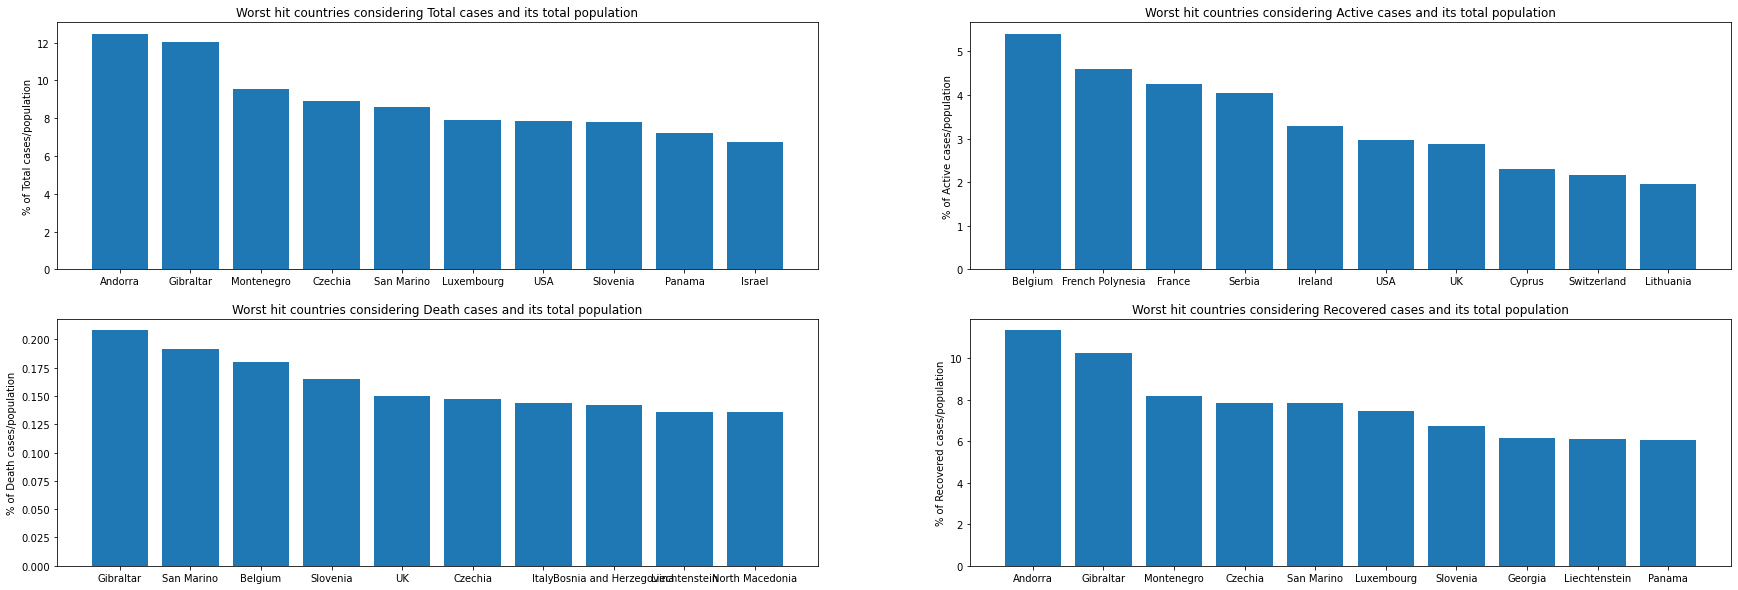

In [172]:
tot = df.sort_values('%Total/population', ascending = False)
y1=tot['%Total/population'].head(10)
x1 = tot['Country'].head(10)
plt.figure(figsize=(30,10))
plt.subplot(2,2, 1)
plt.bar(x1,y1)
plt.title('Worst hit countries considering Total cases and its total population')
plt.ylabel('% of Total cases/population')

act = df.sort_values('%Active/population', ascending = False)
y2=act['%Active/population'].head(10)
x2 = act['Country'].head(10)
# plt.figure(figsize=(25,10))
plt.subplot(2,2, 2)
plt.bar(x2,y2)
plt.title('Worst hit countries considering Active cases and its total population')
plt.ylabel('% of Active cases/population')

dea = df.sort_values('%Death/population', ascending = False)
y3=dea['%Death/population'].head(10)
x3 = dea['Country'].head(10)
# plt.figure(figsize=(25,10))
plt.subplot(2,2, 3)
plt.bar(x3,y3)
plt.title('Worst hit countries considering Death cases and its total population')
plt.ylabel('% of Death cases/population')

rec = df.sort_values('%Recovered/population', ascending = False)
y4=rec['%Recovered/population'].head(10)
x4 = rec['Country'].head(10)
# plt.figure(figsize=(25,10))
plt.subplot(2,2, 4)
plt.bar(x4,y4)
plt.title('Worst hit countries considering Recovered cases and its total population')
plt.ylabel('% of Recovered cases/population')
plt.show()

# tot=pd.DataFrame(df['Country'].drop([0],axis=0),df['%Total/population'].sort_values(ascending=False))
# plt.subplot(2, 2, 1)
# plt.bar(df['Country'].head(10),df['%Total/population'].head(10))
# plt.show()

In [173]:
df['%Total/population'].sort_values(ascending=False).values

array([ 1.24625013e+01,  1.20439365e+01,  9.52457523e+00,  8.91903852e+00,
        8.58059578e+00,  7.89084635e+00,  7.83996780e+00,  7.77556849e+00,
        7.20892358e+00,  6.73165471e+00,  6.63673669e+00,  6.57148546e+00,
        6.43607133e+00,  6.41353074e+00,  6.37280991e+00,  6.32369705e+00,
        5.99595852e+00,  5.93134714e+00,  5.84565067e+00,  5.80411982e+00,
        5.63132139e+00,  5.61036346e+00,  5.60479115e+00,  5.52989499e+00,
        5.45607377e+00,  5.33986513e+00,  5.23236630e+00,  4.71253610e+00,
        4.52400507e+00,  4.46300590e+00,  4.42015901e+00,  4.39465758e+00,
        4.19742409e+00,  4.18725095e+00,  4.14945395e+00,  4.14023772e+00,
        4.09463781e+00,  3.98760247e+00,  3.93813422e+00,  3.91270352e+00,
        3.88768410e+00,  3.82050849e+00,  3.78174891e+00,  3.75152430e+00,
        3.74986139e+00,  3.73669907e+00,  3.69721525e+00,  3.69541095e+00,
        3.55067130e+00,  3.38634600e+00,  3.36658354e+00,  3.36297172e+00,
        3.36280918e+00,  

In [174]:
df['Continent'].unique()

array(['All', 'North America', 'Asia', 'South America', 'Europe',
       'Africa', 'Australia/Oceania'], dtype=object)

# Plot 6:

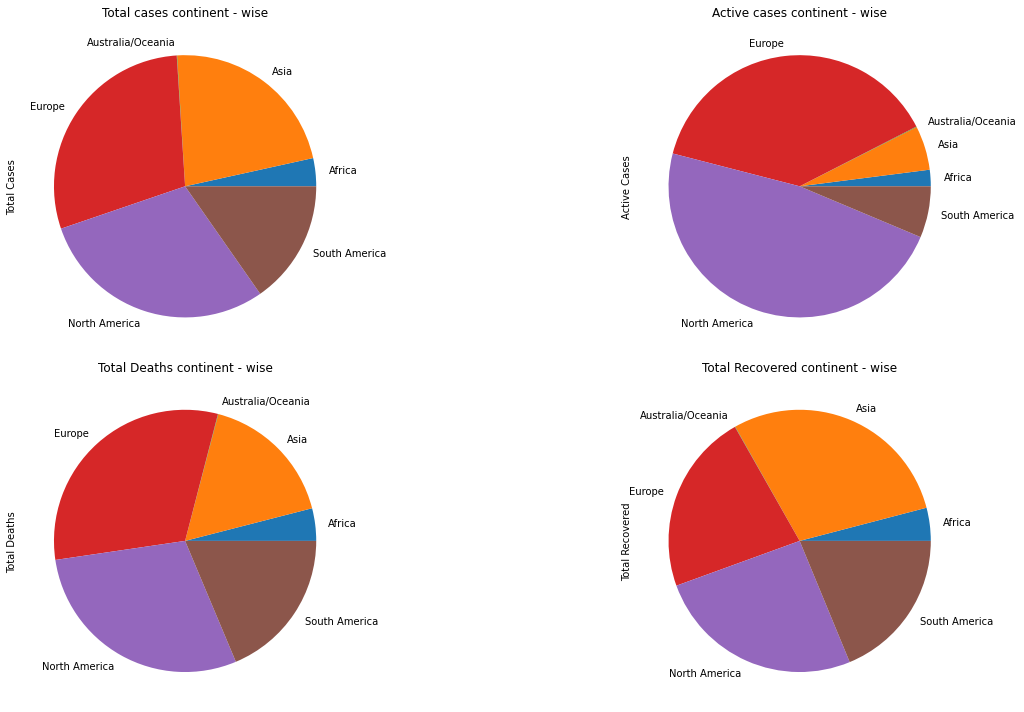

In [175]:
# cdf=df[['Total Cases','Continent']].sort_values('Total Cases',ascending=False).head(10)
# cdf

plt.figure(figsize=(20,10))
plt.subplot(2,2, 1)
cdf=df.groupby('Continent')['Total Cases'].sum()
cdf.drop(['All'],axis=0,inplace=True)
cdf.plot(kind='pie')
plt.title('Total cases continent - wise')

# plt.figure(figsize=(25,10))
plt.subplot(2,2, 2)
cdf=df.groupby('Continent')['Active Cases'].sum()
cdf.drop(['All'],axis=0,inplace=True)
cdf.plot(kind='pie')
plt.title('Active cases continent - wise')


# plt.figure(figsize=(25,10))
plt.subplot(2,2, 3)
cdf=df.groupby('Continent')['Total Deaths'].sum()
cdf.drop(['All'],axis=0,inplace=True)
cdf.plot(kind='pie')
plt.title('Total Deaths continent - wise')


# plt.figure(figsize=(25,10))
plt.subplot(2,2, 4)
cdf=df.groupby('Continent')['Total Recovered'].sum()
cdf.drop(['All'],axis=0,inplace=True)
cdf.plot(kind='pie')
plt.title('Total Recovered continent - wise')

plt.tight_layout()
plt.show()
